In [1]:
# Initialize Otter
# import otter
# grader = otter.Notebook("csc475-575-Spring2022-assignment4.ipynb")

# CSC475/575 Spring 2022 - Assignment 4

This assignment covers topics related to genre classification and collection visualizaton. Information about the course can be found at the 
[CSC475/575 Brightspace](https://bright.uvic.ca/d2l/home/196001). 


* A4.1: Genre classification   
* A4.2: Comparison of classifiers  
* A4.3: Mean and std of beats as features  
* A4.4: Scattar plots using beat features, PCA, t-SNE   
* A4.5: musicnn tags -> naive bayes classifier 

CSC575 only (instead of A4.1): 
* A4.G: visualization of tags and confusion matrix 

Each question is worth 2 points for a total of 10 points for the assignment. 


In [2]:
import numpy as np
import random
import IPython.display as ipd
import matplotlib.pyplot as plt
import math 
%matplotlib inline
# import otter
# grader = otter.Notebook()


#### **Question A4.1 (basic):** 
 

This question is based on this file containing audio features for 3 genres (classical, jazz, and metal) from the GTZAN dataset. It is in svmlight format that scikit-learn can read (the file is provided as an attachment to the assignment). 


`3genres_full.arff.libsvm`

Read the file and perform a classification experiment using a K nearest neighbor classifier (K=3). Each file is represented by 124 audio features. You don't have to implement the classifier from scratch but can use the implementation provided by scikit-learn. Use a MinMaxScaler to normalize the features and perform 5-fold cross-validation. Show the resulting classification report and confusion matrix. Feel free to use any functionality provided by sklearn. 


 (**Basic: 2 points**)


In [3]:
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
data = datasets.load_svmlight_file('3genres_full.arff.libsvm')
X = MinMaxScaler().fit_transform(data[0].toarray())
y = data[1]

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report

m1 = KNeighborsClassifier(n_neighbors=3)
predicted = cross_val_predict(m1, X, y, cv=5)

print('The following is classification report')
print(classification_report(y, predicted))
print('The following is the confusion matrix')
print(confusion_matrix(y, predicted))

The following is classification report
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.91       100
         1.0       0.92      0.84      0.88       100
         2.0       0.90      0.99      0.94       100

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300

The following is the confusion matrix
[[91  6  3]
 [ 8 84  8]
 [ 0  1 99]]


#### **Question A4.2 (basic):** 

Compare the following classifiers in terms of classification accuracy using 5-fold cross-validation. 

1. Linear support vector machine: SVC(kernel="linear", C=0.025)
2. RBF support vector machine:  SVC(gamma=2, C=1)
3. Decision tree: DecisionTreeClassifier(max_depth=5)
4. Gaussian Naive Bayes classifier: GaussianNB()


(**Basic: 2 points**)


In [5]:
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

ms = [
    "SVC(kernel='linear', C=.025)",
    "SVC(kernel='rbf', C=1, gamma=2)",
    "DecisionTreeClassifier(max_depth=5)",
    "GaussianNB()"
]

for m in ms:
    scores = cross_val_score(
        eval(m), X, y, scoring='accuracy', cv=5
    )
    print(f'Accuracy of {m} is {scores}')

Accuracy of SVC(kernel='linear', C=.025) is [0.93333333 0.98333333 0.83333333 0.91666667 0.9       ]
Accuracy of SVC(kernel='rbf', C=1, gamma=2) is [0.93333333 0.85       0.76666667 0.75       0.73333333]
Accuracy of DecisionTreeClassifier(max_depth=5) is [0.85       0.86666667 0.73333333 0.73333333 0.73333333]
Accuracy of GaussianNB() is [0.8        0.93333333 0.6        0.86666667 0.85      ]


**Question A4.3 (expected):** 

In this question we explore the use of an alternative feature front-end based on beat tracking. 
We will use the manually annotated beats that can be found at: 
https://github.com/TempoBeatDownbeat/gtzan_tempo_beat

This is a bit unrealistic as they are manually created but it will serve for illustration purposes. 
Selet the three genres (classical, jazz, metal) and represent each track using two features: 
the mean of the inter-beat durations (the beat period), and the standard deviation of the inter-beat durations. 

Run a classification experiment as in the previous questions using 5-fold cross-validation and classification accuracy as a metric. Compare the results obtained for the following configurations using a linear Support Vector Machine (SVM) classifier: 

1. The two beat-period features 
2. The first two features from the 124 feature vector loaded in question A4.1 
3. The two beat-period features concatenated with the first two features from the 124 feature vector 
4. The 124 feature vector 

**(2 points)** 


In [6]:
import glob 

# Here i download the file into my PC mannually
files = glob.glob('gtzan_tempo_beat-main/beats/*')
files = [f for f in files if any([x in f for x in 'classical, jazz, metal'.split(', ')])]

In [7]:
def handle_beasts(file):
    with open(file) as f:
        lines = f.readlines()
    f.close()
    res = [float(line[0].split('\t')[0]) for line in lines]
    return np.mean(res), np.std(res)
    
X1 = np.array([handle_beasts(f) for f in files])
X2 = X[:, :2]
X3 = np.concatenate([X1, X[:, :2]], axis=1)
X4 = X

Xs = [X1, X2, X3, X4]


for idx, x in enumerate(Xs):
    scores = cross_val_score(
        SVC(), x, y, scoring='accuracy', cv=5
    )
    print(f'Accuracy of the {idx + 1} trial is {scores}')

Accuracy of the 1 trial is [0.33333333 0.3        0.38333333 0.35       0.35      ]
Accuracy of the 2 trial is [0.75 0.65 0.75 0.6  0.55]
Accuracy of the 3 trial is [0.65       0.58333333 0.6        0.55       0.43333333]
Accuracy of the 4 trial is [0.95       0.98333333 0.81666667 0.98333333 0.93333333]


<!-- BEGIN QUESTION -->

#### **Question A4.4 (expected):** 

Show scatter plots of the following configurations using different colors for each genre (classical: blue, jazz:green and metal: red): 

1. The beat-period 2 features 
2. The first 2 features from the 124 feature vector 
3. The first two principal components using PCA on the 124-dimensional feature vectors 
4. A two-dimensional t-SNE plot using the 124-dimensional feature vectors 

You can adapt the following code for this question: 
https://github.com/gtzan/mir_program_kadenze/tree/master/course2/session6


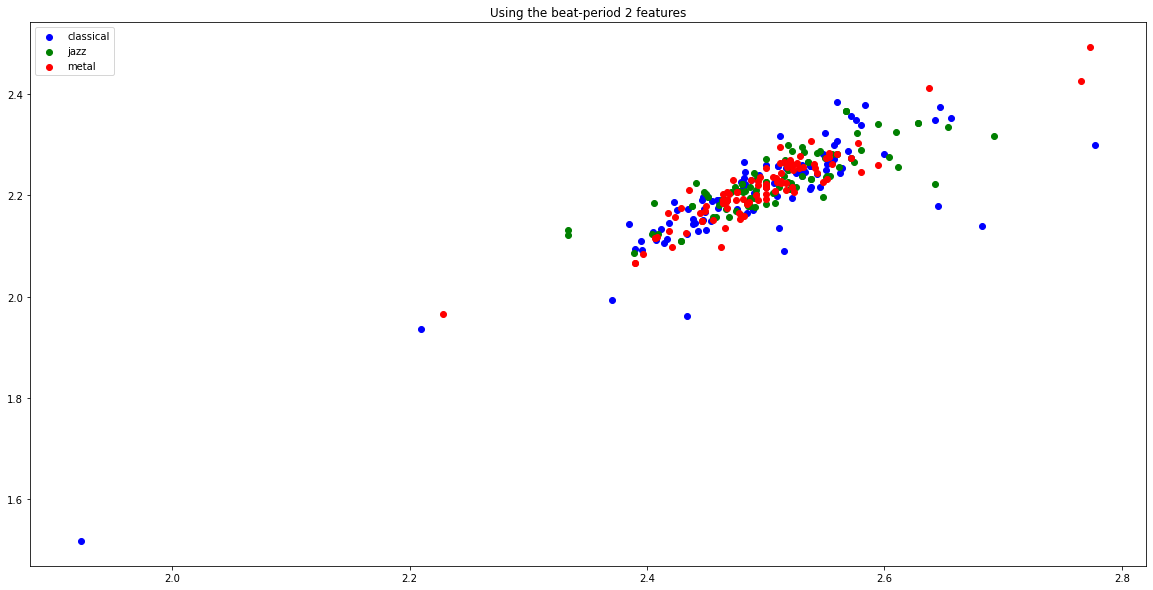

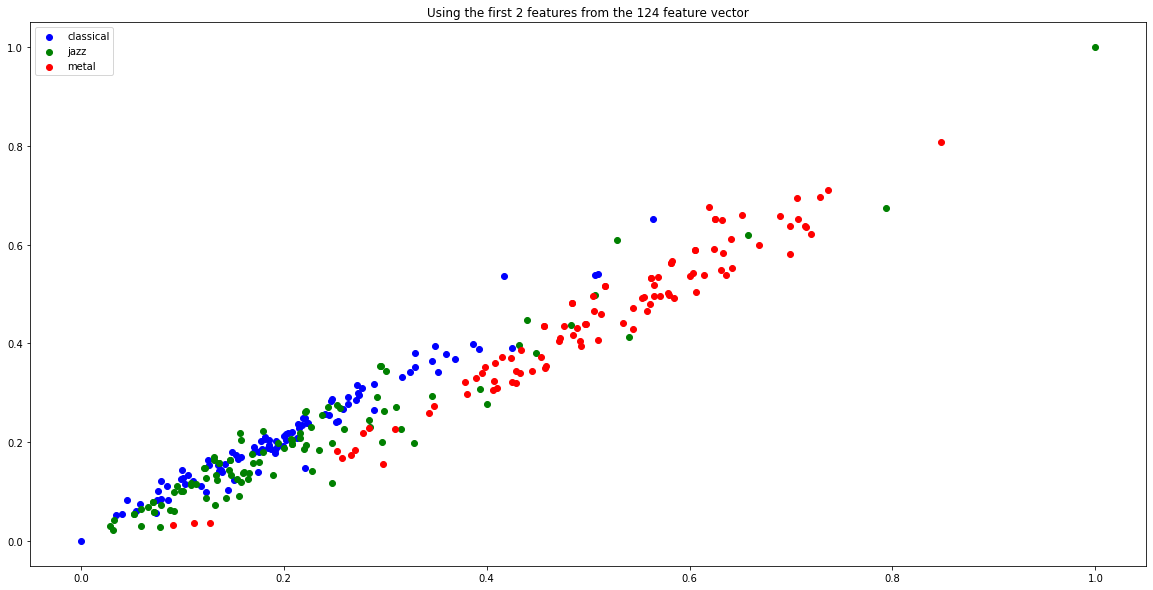

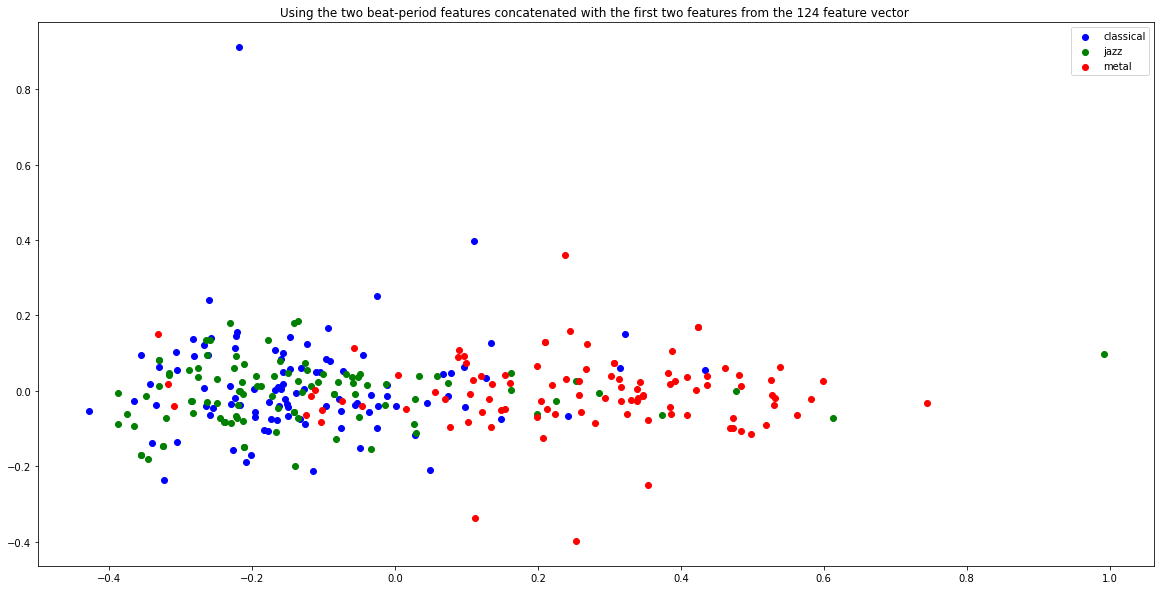

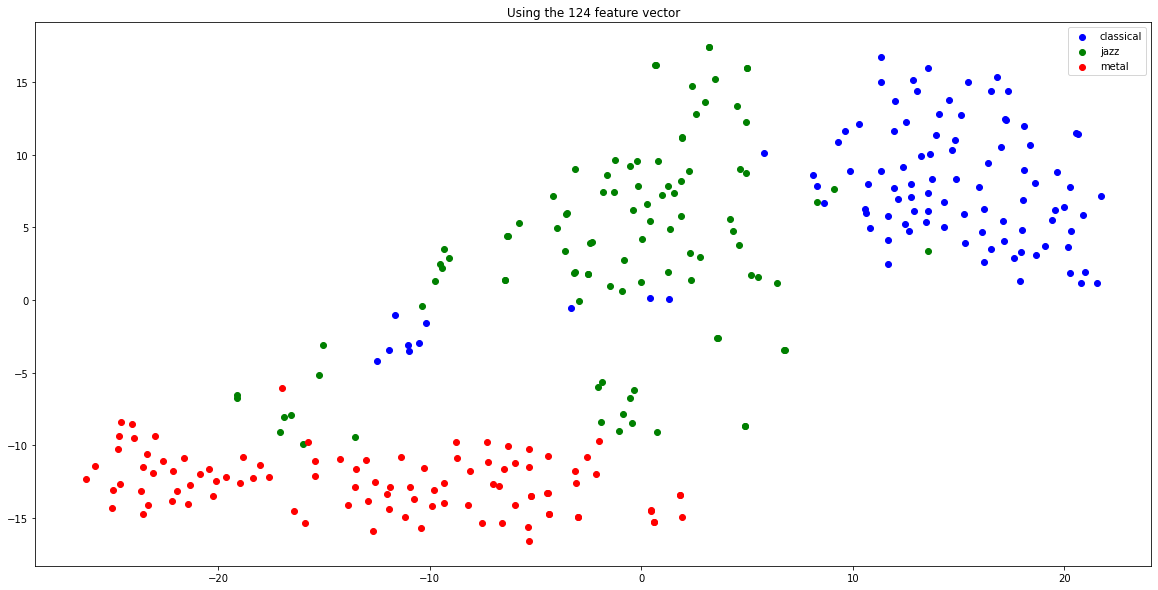

In [8]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# plot 1
plt.figure(figsize=(20, 10))
plt.scatter(X1[:100, 0], X1[:100, 1], c='blue', label='classical')
plt.scatter(X1[100:200, 0], X1[100:200, 1], c='green', label='jazz')
plt.scatter(X1[200:300, 0], X1[200:300, 1], c='red', label='metal')
plt.title('Using the beat-period 2 features')
plt.legend()

# plot 2
plt.figure(figsize=(20, 10))
plt.scatter(X2[:100, 0], X2[:100, 1], c='blue', label='classical')
plt.scatter(X2[100:200, 0], X2[100:200, 1], c='green', label='jazz')
plt.scatter(X2[200:300, 0], X2[200:300, 1], c='red', label='metal')
plt.title('Using the first 2 features from the 124 feature vector')
plt.legend()

# plot 3
pca = PCA()
x3 = pca.fit_transform(X3)
plt.figure(figsize=(20, 10))
plt.scatter(x3[:100, 0], x3[:100, 1], c='blue', label='classical')
plt.scatter(x3[100:200, 0], x3[100:200, 1], c='green', label='jazz')
plt.scatter(x3[200:300, 0], x3[200:300, 1], c='red', label='metal')
plt.title('Using the two beat-period features concatenated with the first two features from the 124 feature vector ')
plt.legend()

# plot 4
tsne = TSNE()
x4 = tsne.fit_transform(X4)
plt.figure(figsize=(20, 10))
plt.scatter(x4[:100, 0], x4[:100, 1], c='blue', label='classical')
plt.scatter(x4[100:200, 0], x4[100:200, 1], c='green', label='jazz')
plt.scatter(x4[200:300, 0], x4[200:300, 1], c='red', label='metal')
plt.title('Using the 124 feature vector')
plt.legend()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question A4.5 (advanced):** 

Extend the visualization from the previous question to visualize the prediction labels in addition to the ground truth labels. Use two concentric circles with the larger one being the ground truth and the smaller one being the prediction (classical: blue/turquoise, jazz: green/brown, country: red:yellow). For classification use a linear SVM for the four configurations from the previous question. Each scatter plot should have a title showing the corresponding classification using 5-fold cross-validation. 

**(2 points)**


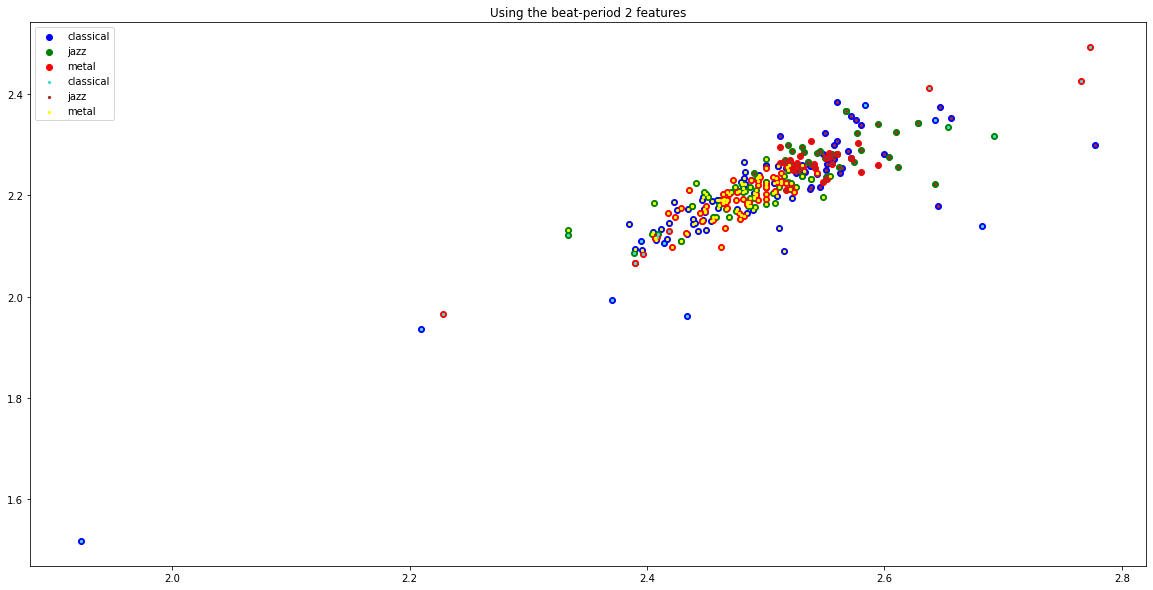

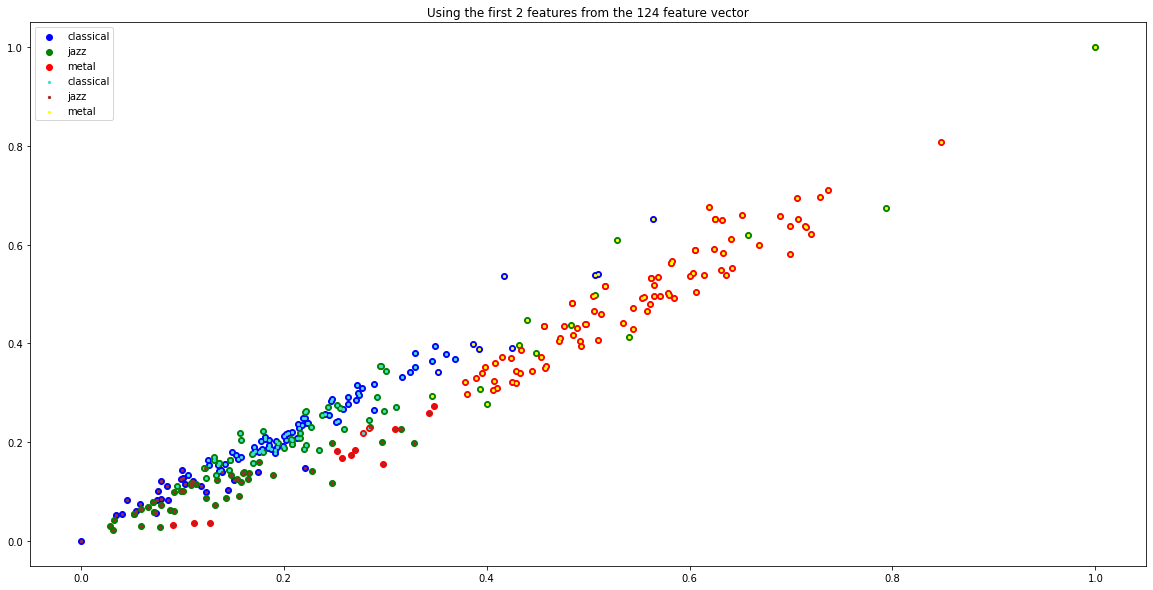

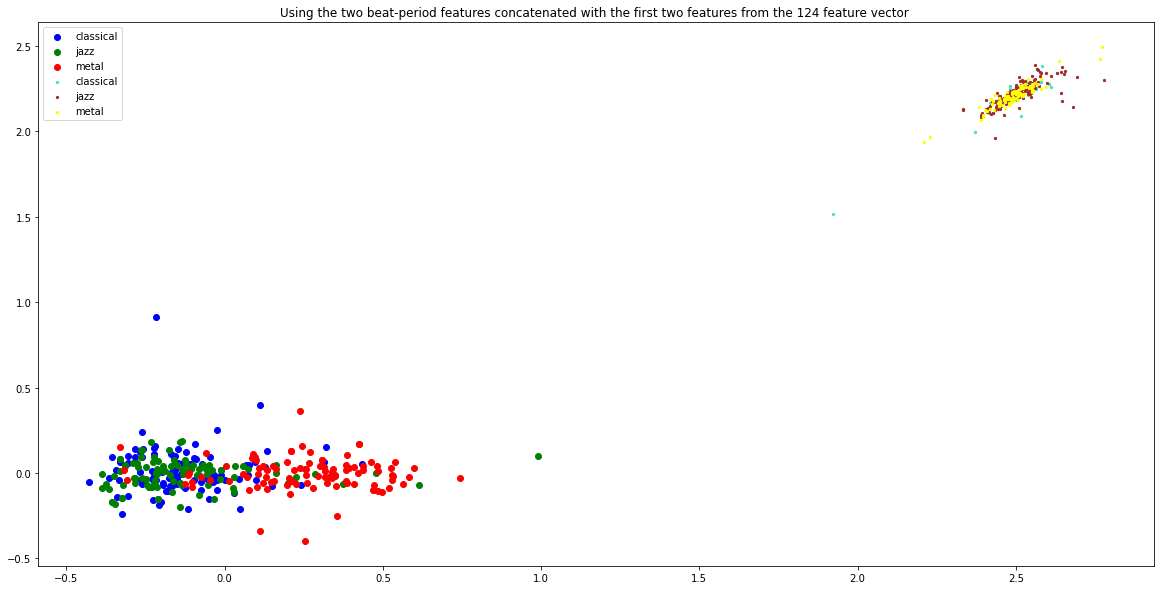

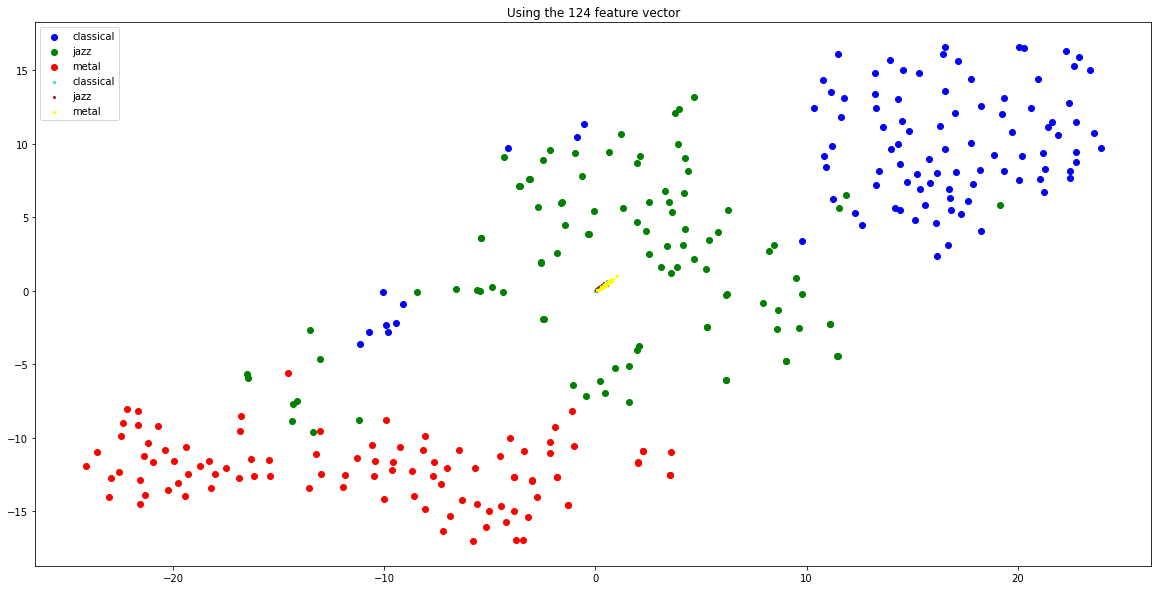

In [9]:
# plot 1
plt.figure(figsize=(20, 10))
plt.scatter(X1[:100, 0], X1[:100, 1], c='blue', label='classical')
plt.scatter(X1[100:200, 0], X1[100:200, 1], c='green', label='jazz')
plt.scatter(X1[200:300, 0], X1[200:300, 1], c='red', label='metal')
predicted = cross_val_predict(SVC(), X1, y, cv=5)
plt.scatter(X1[predicted == 0, 0], X1[predicted == 0, 1], c='turquoise', label='classical', s=5)
plt.scatter(X1[predicted == 1, 0], X1[predicted == 1, 1], c='brown', label='jazz', s=5)
plt.scatter(X1[predicted == 2, 0], X1[predicted == 2, 1], c='yellow', label='metal', s=5)
plt.title('Using the beat-period 2 features')
plt.legend()

# plot 2
plt.figure(figsize=(20, 10))
plt.scatter(X2[:100, 0], X2[:100, 1], c='blue', label='classical')
plt.scatter(X2[100:200, 0], X2[100:200, 1], c='green', label='jazz')
plt.scatter(X2[200:300, 0], X2[200:300, 1], c='red', label='metal')
predicted = cross_val_predict(SVC(), X2, y, cv=5)
plt.scatter(X2[predicted == 0, 0], X2[predicted == 0, 1], c='turquoise', label='classical', s=5)
plt.scatter(X2[predicted == 1, 0], X2[predicted == 1, 1], c='brown', label='jazz', s=5)
plt.scatter(X2[predicted == 2, 0], X2[predicted == 2, 1], c='yellow', label='metal', s=5)
plt.title('Using the first 2 features from the 124 feature vector')
plt.legend()

# plot 3
pca = PCA()
x3 = pca.fit_transform(X3)
plt.figure(figsize=(20, 10))
plt.scatter(x3[:100, 0], x3[:100, 1], c='blue', label='classical')
plt.scatter(x3[100:200, 0], x3[100:200, 1], c='green', label='jazz')
plt.scatter(x3[200:300, 0], x3[200:300, 1], c='red', label='metal')
predicted = cross_val_predict(SVC(), X3, y, cv=5)
plt.scatter(X3[predicted == 0, 0], X3[predicted == 0, 1], c='turquoise', label='classical', s=5)
plt.scatter(X3[predicted == 1, 0], X3[predicted == 1, 1], c='brown', label='jazz', s=5)
plt.scatter(X3[predicted == 2, 0], X3[predicted == 2, 1], c='yellow', label='metal', s=5)
plt.title('Using the two beat-period features concatenated with the first two features from the 124 feature vector ')
plt.legend()

# plot 4
tsne = TSNE()
x4 = tsne.fit_transform(X4)
plt.figure(figsize=(20, 10))
plt.scatter(x4[:100, 0], x4[:100, 1], c='blue', label='classical')
plt.scatter(x4[100:200, 0], x4[100:200, 1], c='green', label='jazz')
plt.scatter(x4[200:300, 0], x4[200:300, 1], c='red', label='metal')
predicted = cross_val_predict(SVC(), X4, y, cv=5)
plt.scatter(X4[predicted == 0, 0], X4[predicted == 0, 1], c='turquoise', label='classical', s=5)
plt.scatter(X4[predicted == 1, 0], X4[predicted == 1, 1], c='brown', label='jazz', s=5)
plt.scatter(X4[predicted == 2, 0], X4[predicted == 2, 1], c='yellow', label='metal', s=5)
plt.title('Using the 124 feature vector')
plt.legend()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### **Question A4.G (CSC575/advanced):** 

This question only needs to be answered by graduate students who are registered in CSC575 and for these students it will be graded instead of question A4.1 which is optional for them. 

For this question you will need to be able to run the `musicnn` auto-tagger developed by Jordi Pons: 
https://github.com/jordipons/musicnn

For each track in the three genres (classical, jazz, metal) we have been exploring in this question calculate the topN (N=10) tags using the `MSD_musicnn` model. Find the 15 most 'popular' tags that is the tags that appear most times in the 300 tracks we are examining. Convert each track to a binary bag of words representation using these 15 most popular tags. Now each track should be represented by 15 binary numbers. 

Adapt the code from performing classification based on lyrics shown at the bottom of this notebook to perform 
Naive Bayes classification using the tag bag-of-words representation: 

https://github.com/gtzan/csc421_tzanetakis/blob/main/csc421_tzanetakis_quantifying_uncertainty.ipynb


<!-- END QUESTION -->



In [10]:
from musicnn.tagger import top_tags
from collections import Counter

all_tags = sum(
    [top_tags(
    file, topN=15, model='MSD_musicnn'
    ) for file in files], []
)
top15 = list(dict(Counter(all_tags).most_common(15)).keys())  # get the top15

# generate the 15 binary variables
XX = np.zeros((300, 15))
for i, file in enumerate(files):
    tags = top_tags(
    file, topN=15, model='MSD_musicnn'
    )
    for j, tag in enumerate(top15):
        if tag in tags:
            XX[i, j] = 1

In [11]:
scores = cross_val_score(
        GaussianNB(), XX, y, scoring='accuracy', cv=5
)
print(f'Accuracy of this trial is {scores}')

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [12]:
grader.check_all()

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [13]:
# Save your notebook first, then run this cell to export your submission.
grader.export()